In [1]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# loading the dataset
# The CIFAR10 dataset contains 60,000 color images in 10 classes, 
# with 6,000 images in each class. The dataset is divided into 50,000 training
# images and 10,000 testing images.
from tensorflow.keras.datasets import cifar10
(X_train, y_train) , (X_test, y_test) = cifar10.load_data()


170500096/170498071 [==============================] - 11s 0us/step


In [3]:
#To know the shape of train dataset
X_train.shape

(50000, 32, 32, 3)

In [4]:
#To know the shape of train dataset
X_test.shape

(10000, 32, 32, 3)

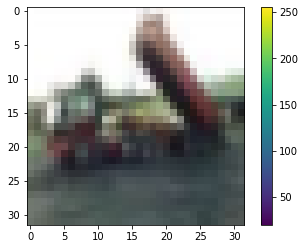

In [5]:
#plt.figure()
plt.imshow(X_train[2])
plt.colorbar()
#plt.grid(False)
plt.show()

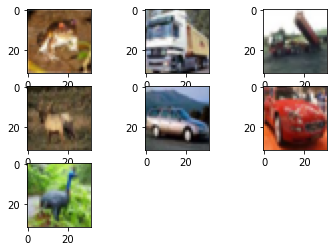

In [6]:
for i in range(7):
    # define subplot
    plt.subplot(330 + 1 + i)
   # plt.subplots(1, 5, figsize=(20,20))
    # plot raw pixel data
    plt.imshow(X_train[i])
plt.show()

In [7]:
#Normalization
X_train, X_test = X_train/255.0, X_test/255.0

In [8]:
#Building CNN model
model = tf.keras.models.Sequential([
                        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
                        tf.keras.layers.MaxPooling2D(2, 2),
                        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
                        tf.keras.layers.MaxPooling2D(2, 2),
                        tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
                        tf.keras.layers.Flatten(),
                        tf.keras.layers.Dense(128, activation='relu'),
                        tf.keras.layers.Dense(10, activation='softmax')])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 32)          18464     
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               6

In [10]:
initial_weights = model.get_weights()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, batch_size = 32, epochs = 10, shuffle = True,validation_data=(X_test,y_test))
model.set_weights(initial_weights)

Epoch 1/10
1563/1563 [==============================] - 38s 24ms/step - loss: 1.5045 - accuracy: 0.4533 - val_loss: 1.2296 - val_accuracy: 0.5607
Epoch 2/10
1563/1563 [==============================] - 33s 21ms/step - loss: 1.1696 - accuracy: 0.5841 - val_loss: 1.1045 - val_accuracy: 0.6075
Epoch 3/10
1563/1563 [==============================] - 33s 21ms/step - loss: 1.0300 - accuracy: 0.6362 - val_loss: 0.9865 - val_accuracy: 0.6561
Epoch 4/10
1563/1563 [==============================] - 34s 22ms/step - loss: 0.9373 - accuracy: 0.6717 - val_loss: 0.9294 - val_accuracy: 0.6773
Epoch 5/10
1563/1563 [==============================] - 33s 21ms/step - loss: 0.8518 - accuracy: 0.7014 - val_loss: 0.9392 - val_accuracy: 0.6754
Epoch 6/10
1563/1563 [==============================] - 33s 21ms/step - loss: 0.7956 - accuracy: 0.7195 - val_loss: 0.9327 - val_accuracy: 0.6816
Epoch 7/10
1563/1563 [==============================] - 33s 21ms/step - loss: 0.7390 - accuracy: 0.7402 - val_loss: 0.8826 -

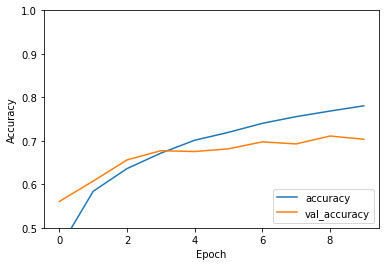

In [11]:
#Plot a graph : Accuracy Vs Val_Accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [12]:
#Data Augmentation
datagen = ImageDataGenerator(
            rotation_range=45,
            width_shift_range=0.15,
            height_shift_range=0.15,
            zoom_range=0.5,
            horizontal_flip=True
            )


In [13]:
datagen.fit(X_train)

In [14]:
history = model.fit_generator(datagen.flow(X_train, y_train,
                                    batch_size=32),
                                    epochs=10,
                                    validation_data=(X_test, y_test),
                                    workers=4)

Epoch 1/10
1563/1563 [==============================] - 59s 38ms/step - loss: 1.9294 - accuracy: 0.2874 - val_loss: 1.5952 - val_accuracy: 0.4291
Epoch 2/10
1563/1563 [==============================] - 58s 37ms/step - loss: 1.6866 - accuracy: 0.3822 - val_loss: 1.5044 - val_accuracy: 0.4505
Epoch 3/10
1563/1563 [==============================] - 57s 37ms/step - loss: 1.5802 - accuracy: 0.4257 - val_loss: 1.4537 - val_accuracy: 0.4809
Epoch 4/10
1563/1563 [==============================] - 57s 36ms/step - loss: 1.5164 - accuracy: 0.4529 - val_loss: 1.2235 - val_accuracy: 0.5618
Epoch 5/10
1563/1563 [==============================] - 58s 37ms/step - loss: 1.4667 - accuracy: 0.4713 - val_loss: 1.2466 - val_accuracy: 0.5509
Epoch 6/10
1563/1563 [==============================] - 58s 37ms/step - loss: 1.4307 - accuracy: 0.4865 - val_loss: 1.1627 - val_accuracy: 0.5831
Epoch 7/10
1563/1563 [==============================] - 58s 37ms/step - loss: 1.3980 - accuracy: 0.4988 - val_loss: 1.1525 -

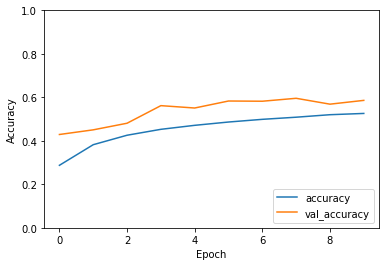

In [15]:
#Plot a graph : Accuracy Vs Val_Accuracy after data augmentation
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')